# Reconstruction in 3D of Z-stack images

In [3]:
#import lybraries
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
import pandas as pd

In [22]:
#Functions used
def Preprocessing(lst_images, Thres, Area, rowcut1, rowcut2, colcut1, colcut2):
    if 'specific' in Area:
        lst_cut_images = []
        for image in lst_images:
            imagergba = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)
            imagecut = imagergba[rowcut1 : rowcut2, colcut1 : colcut2] 
            lst_cut_images.append(imagecut)
        
        for image in lst_cut_images:    
            for c in range(image.shape[1]):
                for r in range(image.shape[0]):
                    if image[r,c][1] < Thres and image[r,c][0] < Thres and image[r,c][2] < Thres:
                        image[r,c][3] = 0
        
        return lst_cut_images
    
    if 'All' in Area:
        lst_images_rgba = []
        for image in lst_images:
            imagergba = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)
            lst_images_rgba.append(imagergba)
        
        for imag in lst_images_rgba:
            for c in range(imag.shape[1]):
                for r in range(imag.shape[0]):
                    if imag[r,c][1] < Thres and imag[r,c][0] < Thres and imag[r,c][2] < Thres:
                        imag[r,c][3] = 0
                                    
        return lst_images_rgba

def SignalModeling(lst_images, thres1, thres2, enhanced, n):
    lst = []
    for image in lst_images:    
        kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (thres1,thres1))
        image1 = cv2.erode(image, kernel1)
        kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (thres2,thres2))
        image2 = cv2.dilate(image1, kernel2)
        lst.append(image2)

    for image in lst:
        if 'Green' in enhanced:
            for row in range(image.shape[0]):
                for col in range(image.shape[1]):
                    image[row,col][1] = image[row,col][1]*n
                    
        if 'Red' in enhanced:
            for row in range(image.shape[0]):
                for col in range(image.shape[1]):
                    image[row,col][0] = image[row,col][0]*n
                    
        if 'Yellow' in enhanced:
            for row in range(image.shape[0]):
                for col in range(image.shape[1]):
                    image[row,col][0] = image[row,col][0]*n
                    image[row,col][1] = image[row,col][1]*n
                    
                    
        if 'Blue' in enhanced:
            for row in range(image.shape[0]):
                for col in range(image.shape[1]):
                    image[row,col][2] = image[row,col][2]*n
            
    return lst  

def ZStack_3D_reconstruction(Channel_num, x, y, z, lst_images1, lst_images2, lst_images3, n):
    fig = plt.figure(figsize = (10,10))
    ax = plt.gca(projection = '3d')
    ax.set_facecolor('black')
    ax.w_xaxis.pane.fill = False
    ax.w_yaxis.pane.fill = False
    ax.w_zaxis.pane.fill = False
    ax.set_xlim(0,x)
    ax.set_zlim(0,y)
    ax.set_zlim(0,z)
    
    i = 150
    for imag in lst_images1:
        X = np.arange(0,imag.shape[1])
        Y = np.arange(0,imag.shape[0])
        x, y = np.meshgrid(X,Y)

        #Plot 3D reconstruction
        ax.plot_surface(x, y, np.atleast_2d(i),  rstride = 1, cstride = 1, facecolors = (imag.astype('float32')/255), )
        i = i + n

    if Channel_num == 2 or Channel_num == 3:
        i = 150
        for imag in lst_images2:
            X = np.arange(0,imag.shape[1])
            Y = np.arange(0,imag.shape[0])
            x, y = np.meshgrid(X,Y)
            
            #Plot 3D reconstruction
            ax.plot_surface(x, y, np.atleast_2d(i),  rstride = 1, cstride = 1, facecolors = (imag.astype('float32')/255), )
            i = i + n
            
    if Channel_num == 3:
        i = 150
        for imag in lst_images3:
            X = np.arange(0,imag.shape[1])
            Y = np.arange(0,imag.shape[0])
            x, y = np.meshgrid(X,Y)
            
            #Plot 3D reconstruction
            ax.plot_surface(x, y, np.atleast_2d(i),  rstride = 1, cstride = 1, facecolors = (imag.astype('float32')/255), )
            i = i + n
    
    return ax


# Working space

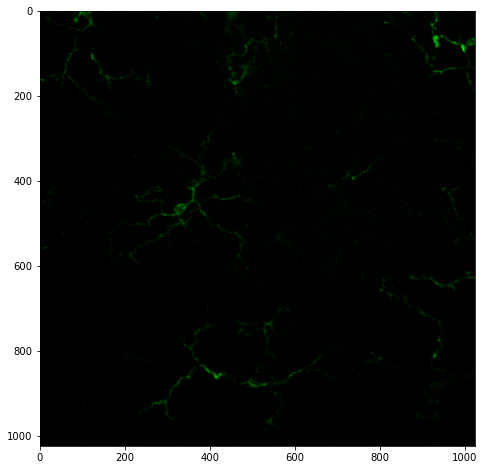

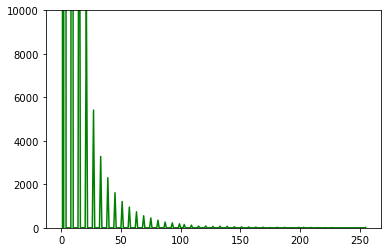

In [16]:
#Temporal mitotracker, lysotracker, phalloidin and merge 
#Open and create a list of images
n_photos = 60

micro = []
for i in range(n_photos):
    i = i + 1
    path = r"C:\Users\Usuario\anaconda3\Python protocols\Imagenes\Microglia salva\control 1\modificadas\iba1\{}.tif".format(i)   
    image = cv2.imread(path)
    imagergba = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    micro.append(imagergba)

plt.figure(figsize = (8,8))
plt.imshow(micro[len(micro)//2])
plt.show()

histo_green = cv2.calcHist(images = [micro[len(micro)//2]], channels = [1], mask = None, histSize = [256], ranges = [0,256])
plt.ylim(0,10000)
plt.plot(histo_green, color = 'green')

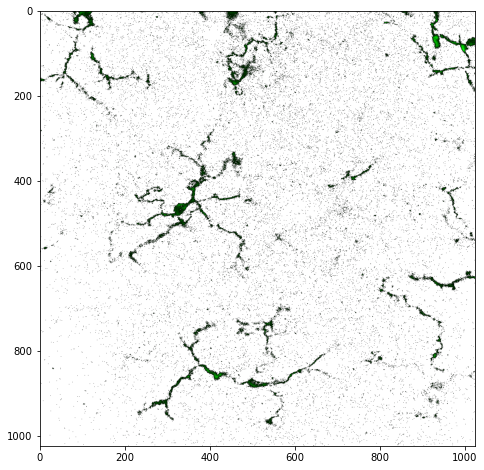

In [23]:
#Preprocessing mitotracker, lysotracker, phalloidin and merge
promicro = Preprocessing(micro, 10,'All', 300, 600, 200, 500)

#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(promicro[len(promicro)//2])
plt.show()

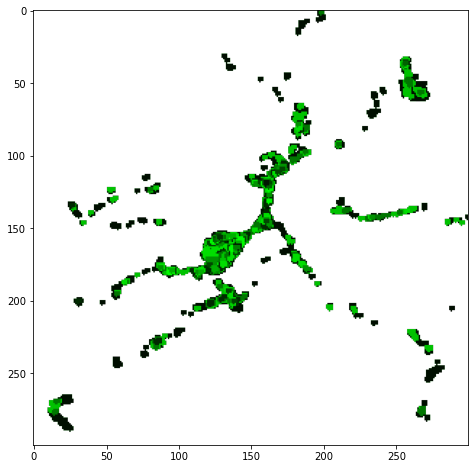

In [32]:
#Modelling merge
Erolvl = 4
Dilalvl = 4
microfil = SignalModeling(promicro, Erolvl, Dilalvl, 'Green', 30)

#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(microfil[len(microfil)//2])
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7600\2030224819.py:65: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection = '3d')


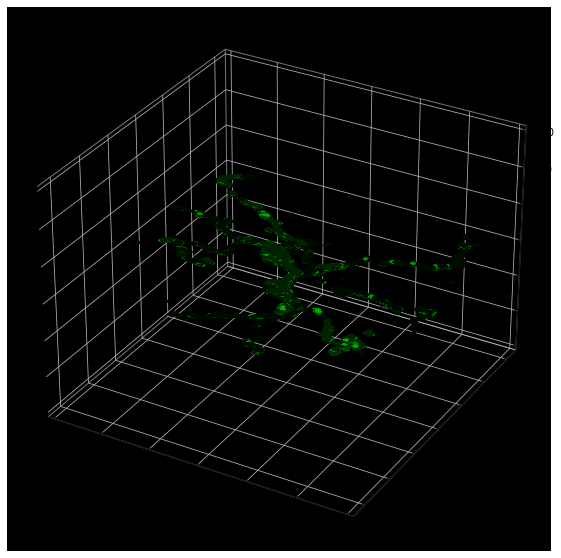

In [33]:
plot3d = ZStack_3D_reconstruction(1, 300, 300, 300, microfil[0:60], None, None, 0.15)

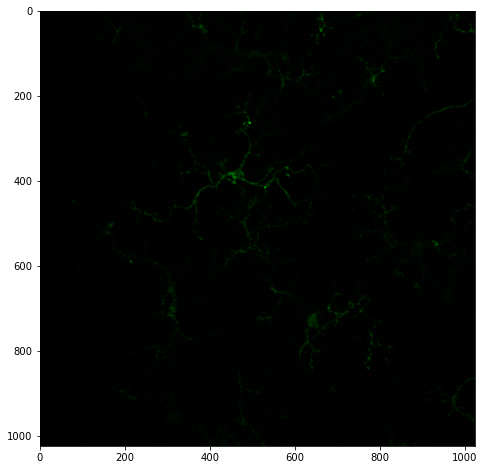

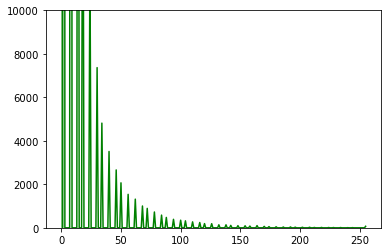

In [135]:
#Temporal mitotracker, lysotracker, phalloidin and merge 
#Open and create a list of images
n_photos = 69

micro = []
for i in range(n_photos):
    i = i + 1
    path = r"C:\Users\Usuario\anaconda3\Python protocols\Imagenes\Microglia salva\control 2\modificadas\iba1\{}.tif".format(i)   
    image = cv2.imread(path)
    imagergba = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    micro.append(imagergba)

plt.figure(figsize = (8,8))
plt.imshow(micro[3])
plt.show()

histo_green = cv2.calcHist(images = [micro[len(micro)//2]], channels = [1], mask = None, histSize = [256], ranges = [0,256])
plt.ylim(0,10000)
plt.plot(histo_green, color = 'green')

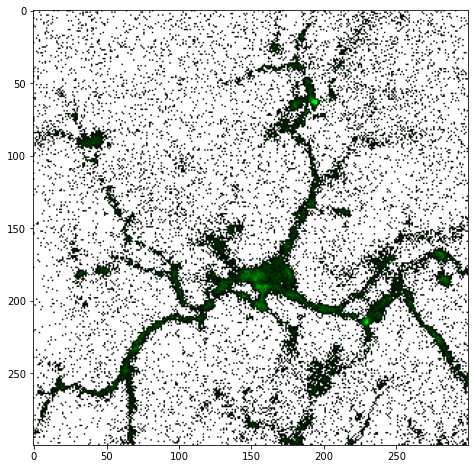

In [136]:
#Preprocessing mitotracker, lysotracker, phalloidin and merge
promicro = Preprocessing(micro, 5, 1,'specific', 200, 500, 300, 600)


#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(promicro[3])
plt.show()

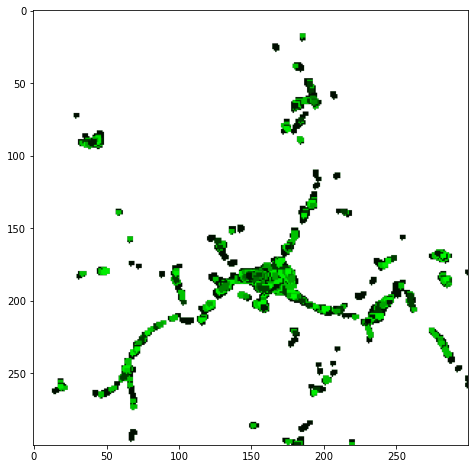

In [137]:
#Modelling merge
Erolvl = 4
Dilalvl = 4
microfil = SignalModeling(promicro, Erolvl, Dilalvl, 'Green', 30)

#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(microfil[3])
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7600\2030224819.py:65: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection = '3d')


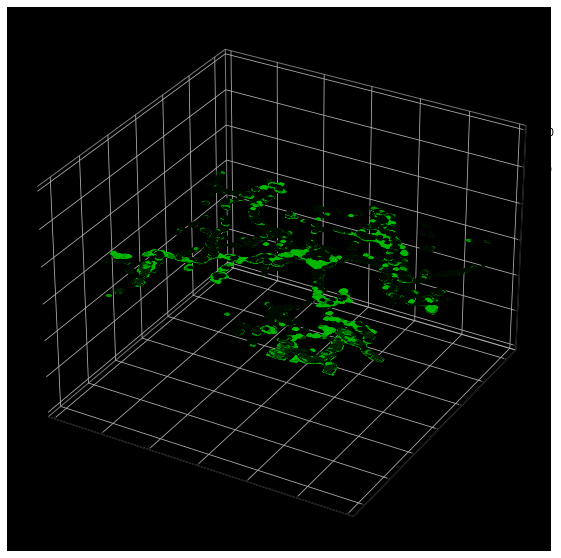

In [138]:
plot3d = ZStack_3D_reconstruction(1, 300, 300, 300, microfil[0:60], None, None, 0.15)

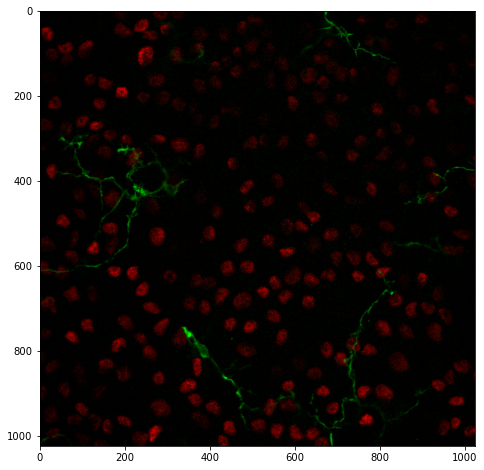

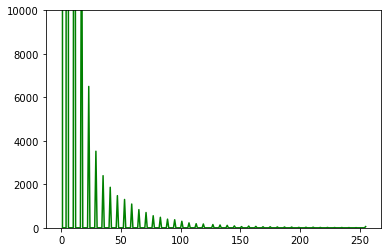

In [143]:
#Temporal mitotracker, lysotracker, phalloidin and merge 
#Open and create a list of images
n_photos = 49

micro = []
for i in range(n_photos):
    i = i + 1
    path = r"C:\Users\Usuario\anaconda3\Python protocols\Imagenes\Microglia salva\sm 2\modificadas\merge\{}.tif".format(i)   
    image = cv2.imread(path)
    imagergba = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    micro.append(imagergba)

plt.figure(figsize = (8,8))
plt.imshow(micro[len(micro)//2])
plt.show()

histo_green = cv2.calcHist(images = [micro[len(micro)//2]], channels = [1], mask = None, histSize = [256], ranges = [0,256])
plt.ylim(0,10000)
plt.plot(histo_green, color = 'green')

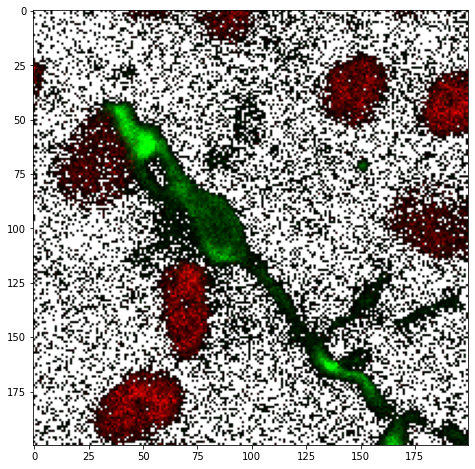

In [144]:
#Preprocessing mitotracker, lysotracker, phalloidin and merge
promicro = Preprocessing(micro, 5, 1,'specific', 700, 900, 300, 500)

#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(promicro[len(promicro)//2])
plt.show()

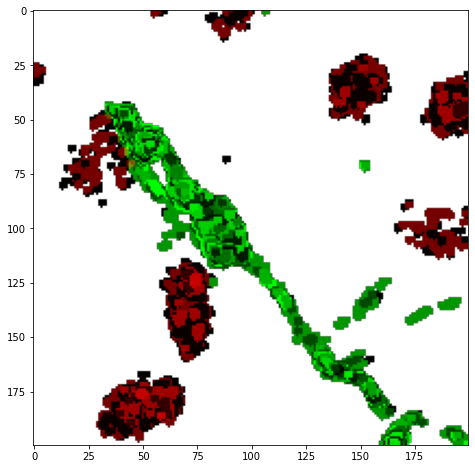

In [145]:
#Modelling merge
Erolvl = 4
Dilalvl = 4
microfil = SignalModeling(promicro, Erolvl, Dilalvl, 'Yellow', 30)

#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(microfil[len(microfil)//2])
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7600\2030224819.py:65: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection = '3d')


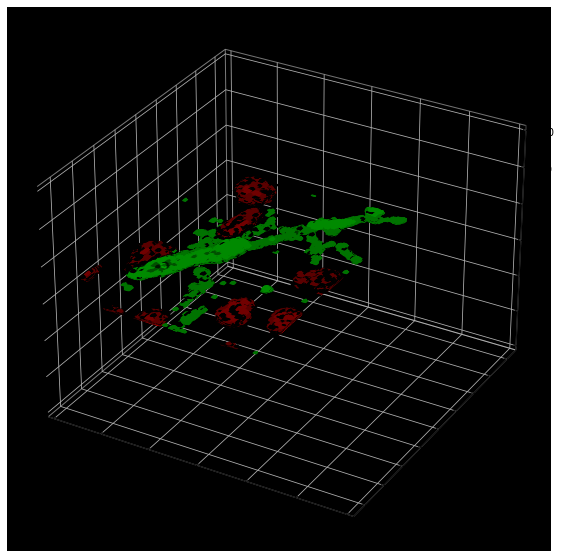

In [146]:
plot3d = ZStack_3D_reconstruction(1, 300, 300, 300, microfil[10:70], None, None, 0.15)

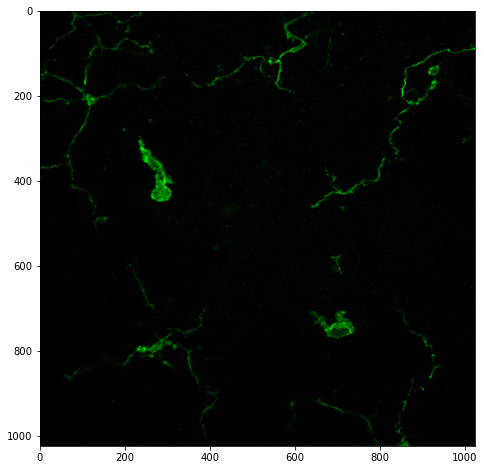

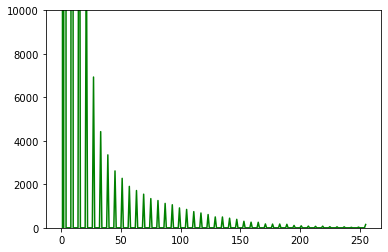

In [147]:
#Temporal mitotracker, lysotracker, phalloidin and merge 
#Open and create a list of images
n_photos = 70

micro = []
for i in range(n_photos):
    i = i + 1
    path = r"C:\Users\Usuario\anaconda3\Python protocols\Imagenes\Microglia salva\sm 1\modificadas\iba1\{}.tif".format(i)   
    image = cv2.imread(path)
    imagergba = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    micro.append(imagergba)

plt.figure(figsize = (8,8))
plt.imshow(micro[len(micro)//2])
plt.show()

histo_green = cv2.calcHist(images = [micro[len(micro)//2]], channels = [1], mask = None, histSize = [256], ranges = [0,256])
plt.ylim(0,10000)
plt.plot(histo_green, color = 'green')

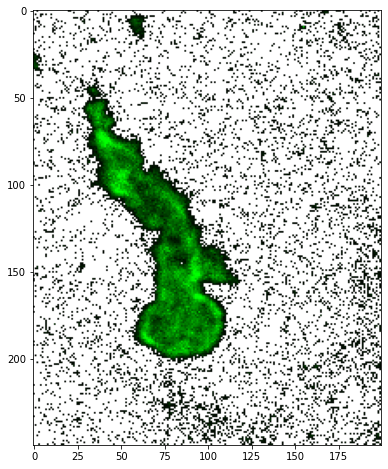

In [149]:
#Preprocessing mitotracker, lysotracker, phalloidin and merge
promicro = Preprocessing(micro, 5, 1,'specific', 250, 500, 200, 400)

#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(promicro[len(promicro)//2])
plt.show()

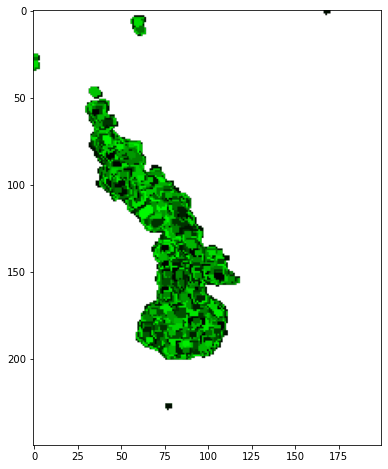

In [150]:
#Modelling merge
Erolvl = 4
Dilalvl = 4
microfil = SignalModeling(promicro, Erolvl, Dilalvl, 'Green', 30)

#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(microfil[len(microfil)//2])
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7600\2030224819.py:65: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection = '3d')


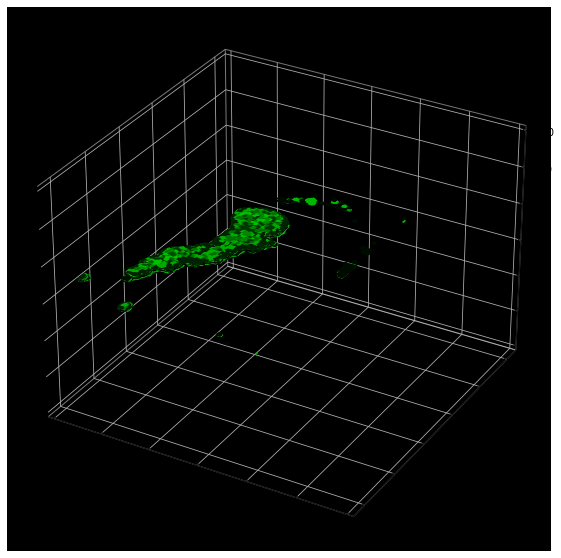

In [151]:
plot3d = ZStack_3D_reconstruction(1, 300, 300, 300, microfil[20:65], None, None, 0.15)

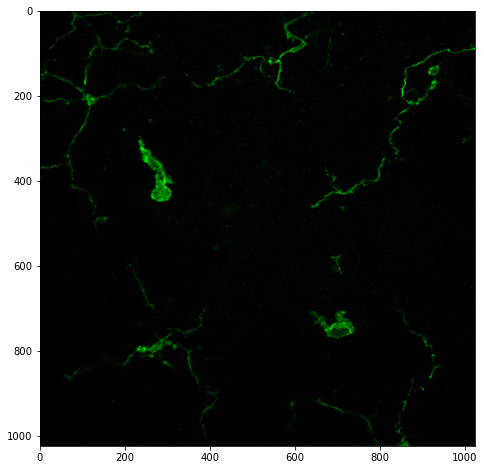

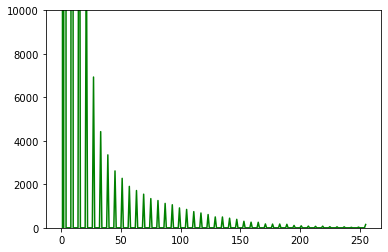

In [3]:
#Temporal mitotracker, lysotracker, phalloidin and merge 
#Open and create a list of images
n_photos = 70

micro = []
for i in range(n_photos):
    i = i + 1
    path = r"C:\Users\Usuario\anaconda3\Python protocols\Imagenes\Microglia salva\sm 1\modificadas\iba1\{}.tif".format(i)   
    image = cv2.imread(path)
    imagergba = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    micro.append(imagergba)

plt.figure(figsize = (8,8))
plt.imshow(micro[len(micro)//2])
plt.show()

histo_green = cv2.calcHist(images = [micro[len(micro)//2]], channels = [1], mask = None, histSize = [256], ranges = [0,256])
plt.ylim(0,10000)
plt.plot(histo_green, color = 'green')

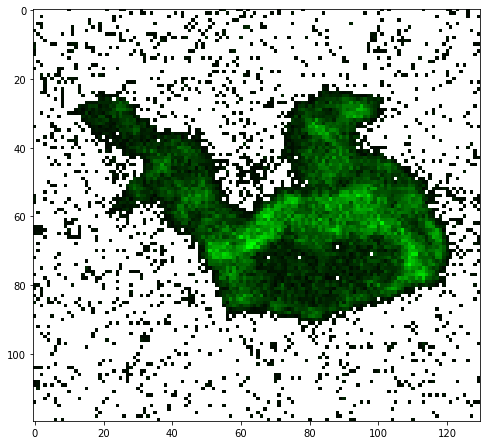

In [8]:
#Preprocessing mitotracker, lysotracker, phalloidin and merge
promicro = Preprocessing(micro, 5, 1,'specific', 680, 800, 620, 750)

#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(promicro[len(promicro)//2])
plt.show()

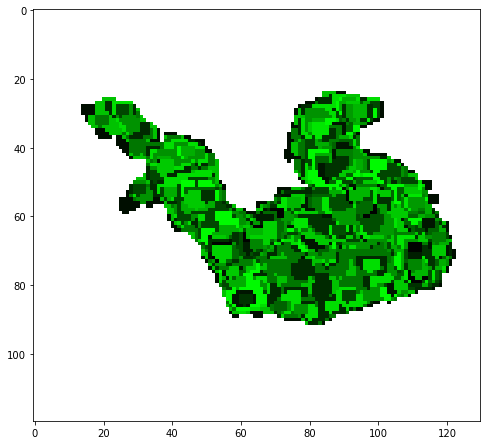

In [9]:
#Modelling merge
Erolvl = 4
Dilalvl = 4
microfil = SignalModeling(promicro, Erolvl, Dilalvl, 'Green', 30)

#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(microfil[len(microfil)//2])
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7396\2030224819.py:65: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection = '3d')


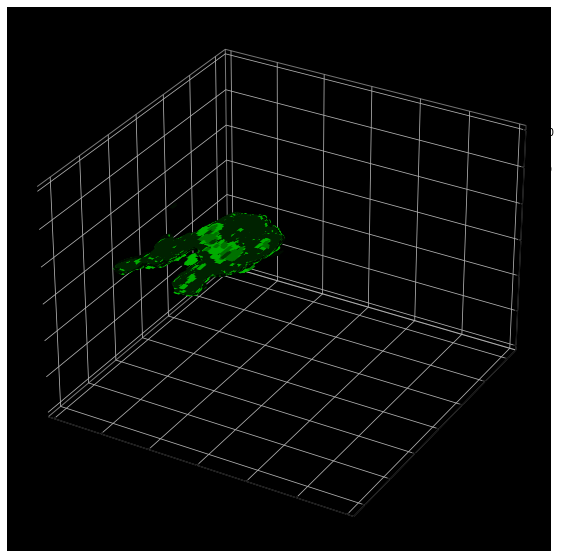

In [10]:
plot3d = ZStack_3D_reconstruction(1, 300, 300, 300, microfil[20:65], None, None, 0.15)

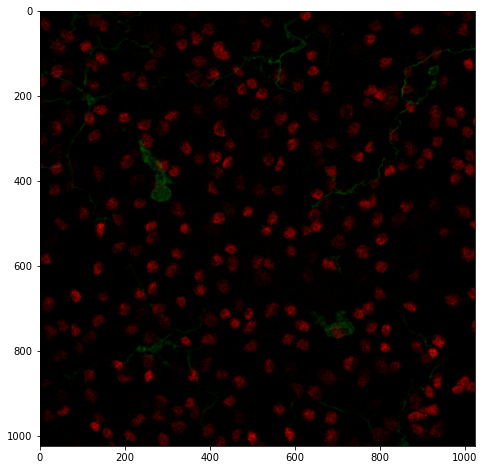

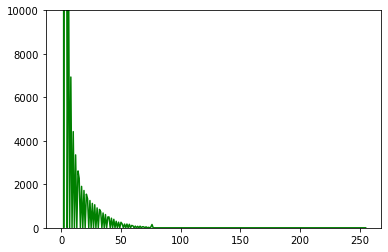

In [7]:
#Temporal mitotracker, lysotracker, phalloidin and merge 
#Open and create a list of images
n_photos = 70

micro = []
for i in range(n_photos):
    i = i + 1
    path = r"C:\Users\Usuario\anaconda3\Python protocols\Imagenes\Microglia salva\sm 1\modificadas\merge\{}.tif".format(i)   
    image = cv2.imread(path)
    imagergba = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    micro.append(imagergba)

plt.figure(figsize = (8,8))
plt.imshow(micro[len(micro)//2])
plt.show()

histo_green = cv2.calcHist(images = [micro[len(micro)//2]], channels = [1], mask = None, histSize = [256], ranges = [0,256])
plt.ylim(0,10000)
plt.plot(histo_green, color = 'green')

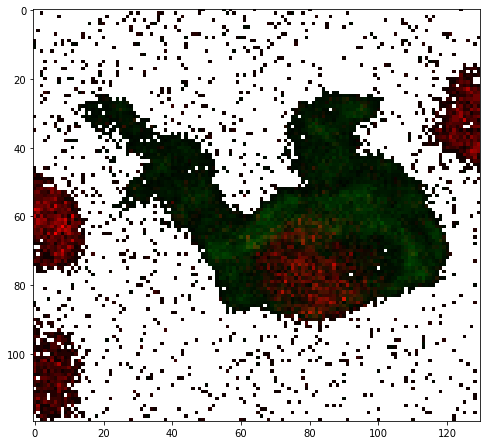

In [8]:
#Preprocessing mitotracker, lysotracker, phalloidin and merge
promicro = Preprocessing(micro, 5, 1,'specific', 680, 800, 620, 750)

#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(promicro[len(promicro)//2])
plt.show()

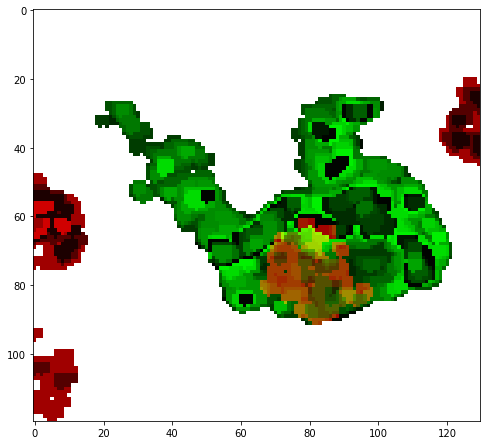

In [9]:
#Modelling merge
Erolvl = 4
Dilalvl = 4
microfil = SignalModeling(promicro, Erolvl, Dilalvl, 'Yellow', 10)

#plot representative figure
plt.figure(figsize = (8,8))
plt.imshow(microfil[len(microfil)//2])
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5508\2030224819.py:65: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection = '3d')


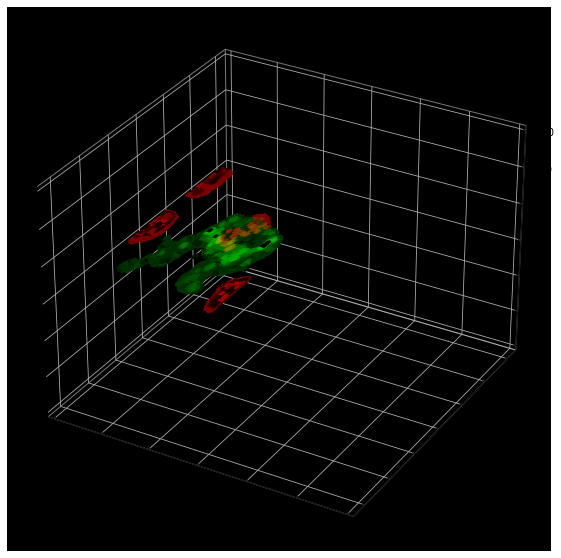

In [10]:
plot3d = ZStack_3D_reconstruction(1, 300, 300, 300, microfil[20:45], None, None, 0.15)